# Аналитика дата сета


Изначальный данные для обучения взял с ресурса (Набор данных дронов Lacmus (LADD))
https://www.kaggle.com/datasets/mersico/lacmus-drone-dataset-ladd-v40?resource=download



# Библиотеки

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Константы

In [21]:
FOLDER_IMAGE_PATH = "./DataSet/dataLADD/images"
FOLDER_LABEL_PATH = "./DataSet/dataLADD/label_YOLO"

winter_count_image = 407

In [27]:
# Получить количество файлов в папке
def count_files_in_folder(folder_path):
    files = os.listdir(folder_path)
    num_files = len([file for file in files if os.path.isfile(os.path.join(folder_path, file))])
    return num_files

# # Проверка зимнее ли фото или летнее
# def is_winter_image(image_path):
#     image = cv2.imread(image_path)
#     # Преобразуем изображение в цветовое пространство HSV
#     hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#     # Определяем среднее значение яркости (V) и насыщенности (S)
#     avg_saturation = np.mean(hsv_image[:, :, 1])  # Средняя насыщенность
#     avg_value = np.mean(hsv_image[:, :, 2])  # Средняя яркость

#     # Простое условие: низкая насыщенность и яркость могут указывать на зимнее изображение
#     if avg_saturation < 60 and avg_value < 120:
#         return True
#     else:
#         return False

# # Подсчет количетва зимних и летних фотографий на основе цветового анализа
# def count_winter_summer_images(folder_path):
#     winter_count = 0
#     summer_count = 0
    
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             image_path = os.path.join(folder_path, filename)
#             if is_winter_image(image_path):
#                 winter_count += 1
#             else:
#                 summer_count += 1

#     return winter_count, summer_count

# функция для построения графика
def plot_image_counts(total, winter, summer):
    labels = ['Всего', 'Зимние', 'Летние']
    counts = [total, winter, summer]
    
    # Построение гистограммы
    fig, ax = plt.subplots()
    bars = ax.bar(labels, counts, color=['blue', 'cyan', 'orange'])
    
    # Добавление подписей на столбцах
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height - 0.05, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

    # Настройка графика
    plt.ylabel('Number of Images')
    plt.title('Image Count: Total, Winter, Summer')
    plt.show()

In [23]:
# Пример использования
total_files = count_files_in_folder(FOLDER_IMAGE_PATH)
# winter_count, summer_count = count_winter_summer_images(FOLDER_IMAGE_PATH)

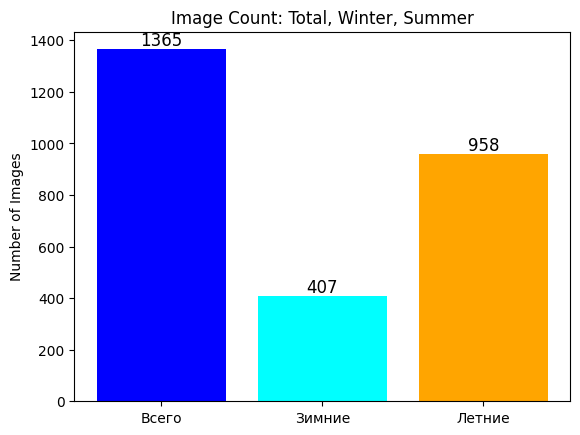

In [28]:
# Построение графика
plot_image_counts(total_files, winter_count_image, total_files - winter_count_image)

In [57]:
# Функция для подсчета строк в аннотационном файле
def count_lines_in_annotation_file(file_path):
    with open(file_path, 'r') as file:
        return len(file.readlines())

# Функция для обработки файлов в указанном диапазоне
def count_annotations_in_range(folder_path, start_file_number, end_file_number):
    total_annotations = 0
    file_count = 0

    for filename in sorted(os.listdir(folder_path)):
        try:
            file_number = int(os.path.splitext(filename)[0])
        except ValueError:
            continue

        if start_file_number <= file_number <= end_file_number:
            annotation_file_path = os.path.join(folder_path, f"{file_number}.txt")

            if os.path.exists(annotation_file_path):
                line_count = count_lines_in_annotation_file(annotation_file_path)
                total_annotations += line_count
                file_count += 1

    return total_annotations, file_count

# функция для построения графика
def plot_image_counts_label(winter, winter_data, summer, summer_data):
    labels = ['Зимние', 'Зимние разметки', 'Летние', 'Летние разметки']
    counts = [winter, winter_data, summer, summer_data]
    
    # Построение гистограммы
    fig, ax = plt.subplots()
    bars = ax.bar(labels, counts, color=['blue', 'blue', 'orange', 'orange'])
    
    # Добавление подписей на столбцах
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/4, height - 0.05, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

    # Настройка графика
    plt.ylabel('Number of Images')
    plt.title('Image Count: Total, Winter, Summer')
    plt.show()

In [52]:
start_file_number = 0
end_file_number = winter_count_image - 1
total_annotations_winter, file_count_winter = count_annotations_in_range(FOLDER_LABEL_PATH, start_file_number, end_file_number)

In [50]:
start_file_number = winter_count_image
end_file_number = total_files
total_annotations_sumer, file_count_sumer = count_annotations_in_range(FOLDER_LABEL_PATH, start_file_number, end_file_number)

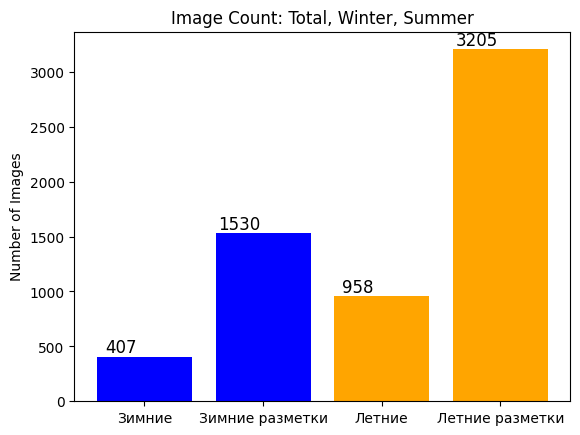

In [59]:
plot_image_counts_label(file_count_winter, total_annotations_winter, file_count_sumer, total_annotations_sumer )